In [13]:
# Importing required libraries

import pandas as pd
import numpy as np
import random
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import Imputer


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Loading the dataset
dataset = pd.read_csv("training.csv")

In [16]:
# testDataset = pd.read_csv("testing.csv")
# dataset = testDataset

In [17]:
# Converting to categorical

for col in ['Gr2Ind_Var1', 'Gr2Ind_Var3', 'Gr2Ind_Var4', 'Gr2Ind_Var6', 'Gr2Ind_Var9', 'Gr2Ind_Var10']:
    dataset[col] = dataset[col].astype('object')

dataset = dataset.drop(['Gr2Ind_Var2', 'Identifier'], axis = 1)

In [18]:
# Missing value treatment

dataset.fillna(dataset.median(), inplace=True)
#dataset.fillna('other', inplace=True)

for col in ['Gr2Ind_Var1', 'Gr2Ind_Var3', 'Gr2Ind_Var4', 'Gr2Ind_Var6', 'Gr2Ind_Var9', 'Gr2Ind_Var10']:
    dataset[col].fillna('other' + col, inplace=True)

In [19]:
numerical_data = dataset.select_dtypes(include = ['int64','float'])
categorical_data = dataset.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [20]:
one_hot_variables =np.delete(categorical_features,[0])

In [21]:
categorical_features

array(['Date', 'Gr2Ind_Var1', 'Gr2Ind_Var3', 'Gr2Ind_Var4', 'Gr2Ind_Var6',
       'Gr2Ind_Var9', 'Gr2Ind_Var10'], dtype=object)

In [22]:
def onehotencoder(dataset_columns_with_data,column):
    return dataset.drop(columns=[column]).join(pd.get_dummies(dataset[column],drop_first=True, prefix = [column]))
#replacing nominal categorical features with numeric data using one hot encoding technique
for feature in one_hot_variables:
    dataset = onehotencoder(dataset,feature)

In [23]:
numerical_data = dataset.select_dtypes(include = ['int64','float'])
categorical_data = dataset.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [24]:
scale_variables=np.delete(numerical_features,0)

In [25]:
categorical_features

array(['Date'], dtype=object)

In [26]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(dataset[scale_variables])
scaled_df = pd.DataFrame(scaled_df, columns=scale_variables)

In [27]:
combineddf = dataset[categorical_features].join(scaled_df)

In [28]:
y=dataset['Dep_Var']

In [29]:
def slice(x):
    return x[5:7]
dataset["Month"] = dataset['Date'].apply(slice)
dataset["Month"] = dataset["Month"].astype(int)

In [30]:
combined_numerical_data = combineddf.select_dtypes(include = ['int64','float','int32'])
combined_numerical_features = combined_numerical_data.columns.values

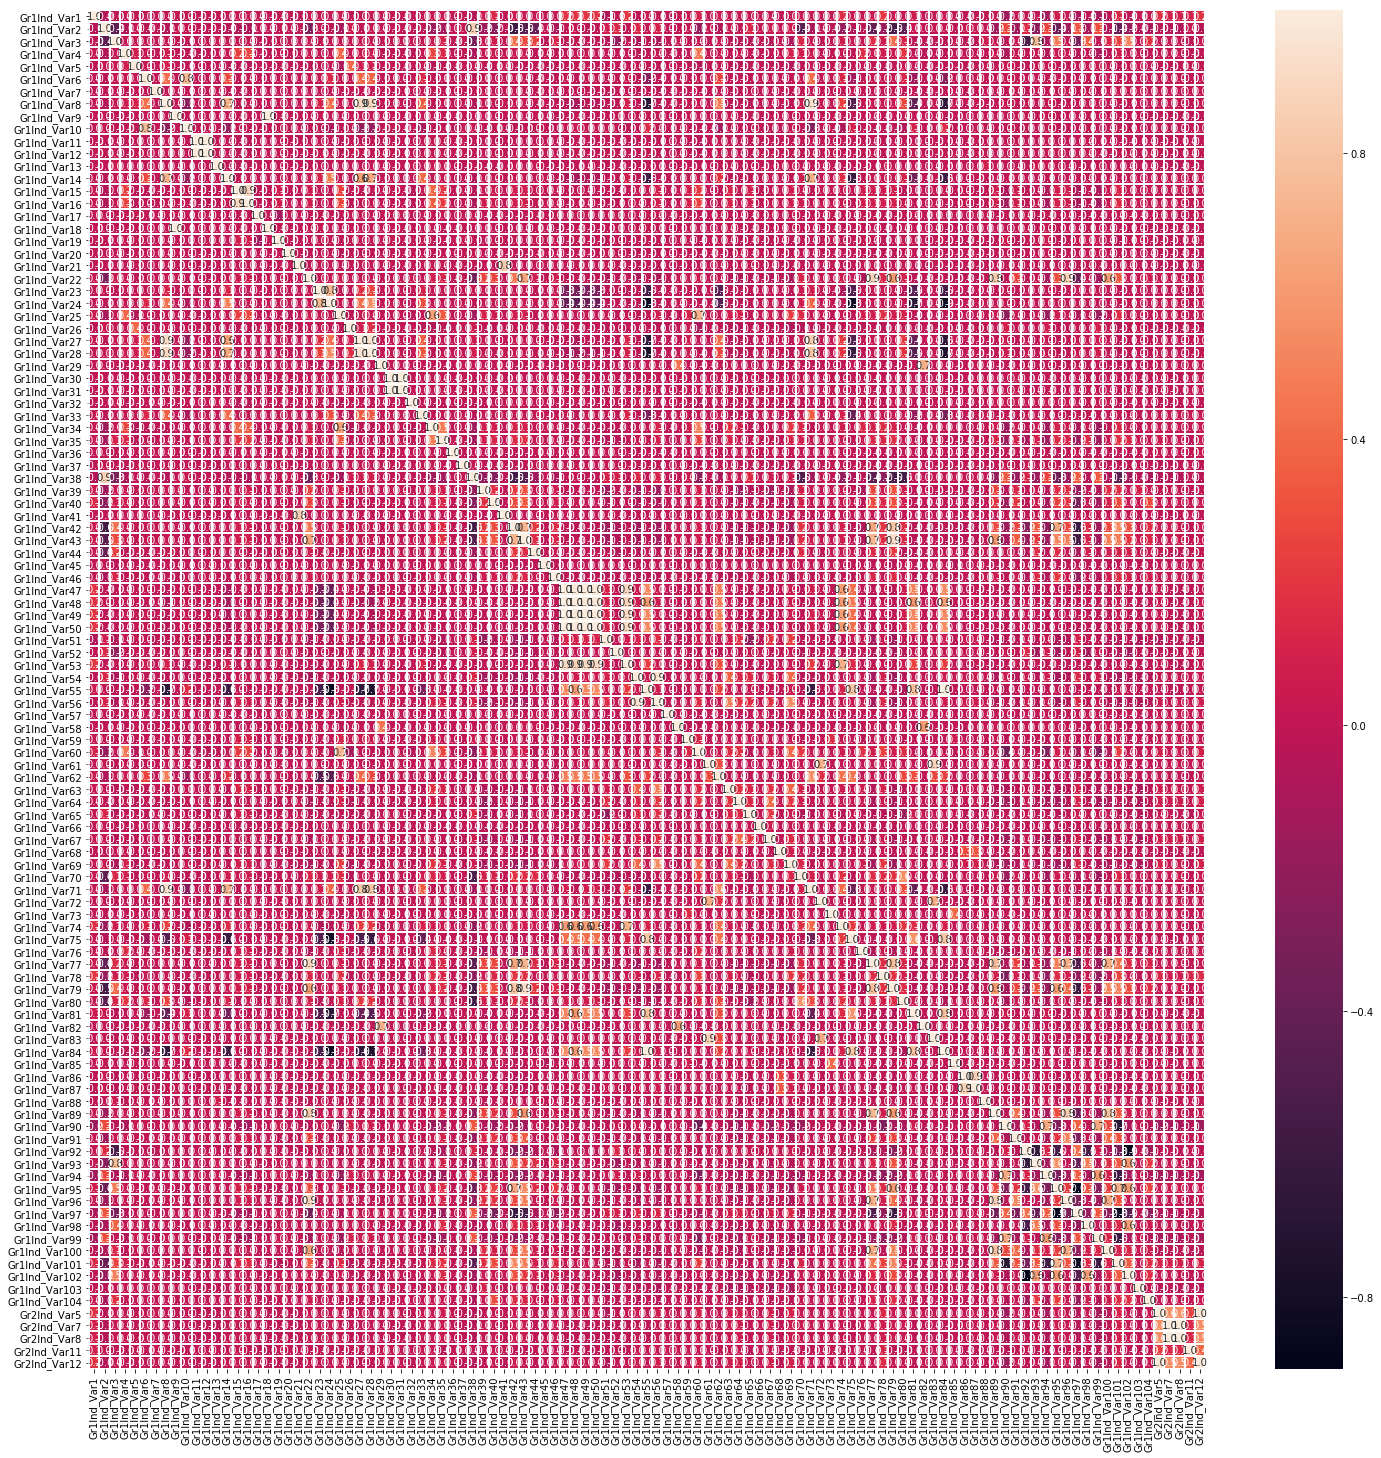

In [31]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(combineddf.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

In [32]:
collinear_features_str = 'Gr1Ind_Var30,Gr2Ind_Var8,Gr1Ind_Var50,Gr1Ind_Var49,Gr1Ind_Var9,Gr1Ind_Var55,Gr1Ind_Var28,Gr2Ind_Var12,Gr1Ind_Var56,Gr1Ind_Var71,Gr1Ind_Var47,Gr1Ind_Var50,Gr1Ind_Var49,Gr1Ind_Var15,Gr1Ind_Var102,Gr1Ind_Var8,Gr1Ind_Var53,Gr1Ind_Var61,Gr1Ind_Var22,Gr1Ind_Var95,Gr1Ind_Var86,Gr1Ind_Var2,Gr1Ind_Var96,Gr1Ind_Var24,Gr1Ind_Var89,Gr1Ind_Var24,Gr1Ind_Var27'
collinear_features=collinear_features_str.split(',')

In [33]:
combineddf.drop(columns=collinear_features,inplace=True)

In [34]:
combineddf.drop(columns=['Gr1Ind_Var12','Gr1Ind_Var43','Gr1Ind_Var79','Gr1Ind_Var42'],inplace=True)

In [35]:
numerical_data = combineddf.select_dtypes(include = ['int64','float','int'])
categorical_data = combineddf.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values
len(categorical_features)

1

In [36]:
categorical_features

array(['Date'], dtype=object)

In [37]:
traindata = combineddf.loc[:27276,:]
testdata = combineddf.loc[27276:,:]
ytrain =y[:27277].astype(str)
ytest = y[27276:].astype(str)

In [38]:
ytrain=ytrain.astype(int)
ytest = ytest.astype(int)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, max_depth=5)
rfc.fit(combineddf[numerical_features],y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = dataset[numerical_features].columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [41]:
feature_importances.head(30)

,importance
Gr1Ind_Var90,0.124411
Gr1Ind_Var94,0.082964
Gr1Ind_Var85,0.066220
Gr1Ind_Var1,0.064157
Gr1Ind_Var99,0.058400
Gr1Ind_Var70,0.057808
Gr1Ind_Var74,0.050466
Gr1Ind_Var38,0.042553
Gr1Ind_Var67,0.042308
Gr1Ind_Var101,0.035890


In [42]:
PredFeatures = feature_importances.head(30).index.tolist()

rfc.fit(dataset[PredFeatures],y)
# predictions

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
testdataset = pd.read_csv("testing.csv")

In [44]:
rfc_predict = rfc.predict(testdataset[PredFeatures].fillna(0))

In [45]:
a = rfc_predict.tolist()

In [46]:
print(a)

[17, 1, 14, 10, 11, 13, 18, 12, 19, 13, 12, 8, 9, 12, 1, 18, 17, 10, 0, 12, 10, 19, 13, 12, 1, 9, 19, 1, 12, 11, 13, 13, 12, 10, 2, 10, 1, 2, 12, 13, 0, 13, 14, 17, 1, 0, 9, 13, 1, 13, 18, 1, 13, 13, 13, 9, 12, 19, 0, 9, 0, 10, 10, 18, 1, 8, 16, 17, 13, 11, 11, 8, 1, 16, 8, 19, 13, 13, 1, 8, 12, 15, 10, 17, 0, 13, 12, 0, 1, 0, 9, 7, 1, 1, 17, 12, 14, 1, 1, 11, 13, 10, 1, 17, 1, 0, 13, 12, 8, 11, 5, 12, 5, 7, 2, 1, 2, 10, 13, 13, 1, 0, 2, 2, 13, 8, 12, 18, 13, 1, 1, 17, 17, 9, 1, 19, 9, 8, 10, 2, 0, 10, 6, 13, 1, 8, 1, 10, 0, 9, 10, 17, 0, 13, 19, 1, 10, 8, 0, 10, 2, 19, 13, 18, 1, 10, 0, 9, 0, 1, 2, 13, 1, 11, 0, 2, 11, 18, 9, 2, 12, 12, 1, 13, 17, 2, 1, 12, 0, 10, 9, 12, 1, 12, 0, 13, 0, 18, 8, 6, 9, 13, 12, 0, 0, 1, 0, 9, 12, 17, 19, 0, 12, 6, 19, 13, 10, 19, 0, 13, 19, 17, 13, 1, 13, 8, 2, 0, 0, 10, 9, 13, 1, 0, 17, 0, 13, 9, 1, 10, 12, 16, 12, 13, 0, 9, 9, 10, 12, 2, 10, 14, 8, 13, 13, 12, 9, 2, 14, 0, 13, 10, 2, 0, 10, 10, 13, 9, 10, 13, 2, 13, 19, 8, 13, 13, 5, 0, 19, 17, 12, 2, 

In [47]:
df = pd.DataFrame()
df['predicted'] = a

In [48]:
df.to_csv('predicted1.csv')

In [49]:
valuCheck.corr()

NameError: name 'valuCheck' is not defined

In [ ]:
mape = np.abs(check['Pred']-check['actual']).sum()/check.shape[0]

In [ ]:
mape

In [ ]:
combineddf

In [ ]:
combineddf.join(dataset['Dep_Var']).to_csv('combineddf.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(traindata[numerical_features],ytrain)
predictions = logmodel.predict(testdata[numerical_features])

from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))